# Verinin içeri aktarılması, hazırlanması ve kütüphanelerin yüklenmesi


In [ ]:
# kütüphanelerin içeri aktarılması 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [ ]:
#veriyi içeri aktaralım:
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/deep_leaning/ortopedik_hastalarin_biyomekanik_ozellikleri.csv")
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


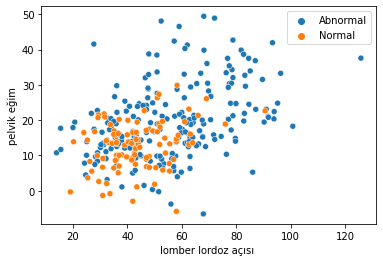

In [ ]:
sns.scatterplot(data=data, x="lumbar_lordosis_angle", y="pelvic_tilt numeric", hue="class")
plt.xlabel("lomber lordoz açısı ")
plt.ylabel("pelvik eğim")
plt.legend()
plt.show()

In [ ]:
data["class"]= [1 if each =="Abnormal" else 0 for each in data ["class"]]
data.head()
#scikit learn'ün istediği formata getirebilmek için 0 ve 1 ile doldurduk.

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [ ]:
y=data["class"].values #sınıfları y değişkeni içerisine koyalım
x_data=data.drop(["class"],axis=1) #özellikleri x_data içerisine atadık

In [ ]:
#normalizasyon: 
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values

In [ ]:
# eğitim test bölünmesi

from sklearn.model_selection import train_test_split

# %15 test, % 85 eğitim 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

## KNN algoritması ve en iyi k değerinin bulunması
- veri seti boyutunun  az olduğunda yapılması önerilir. 

In [ ]:
# knn model 
from sklearn.neighbors import KNeighborsClassifier 

komsu_sayisi = 4 
knn= KNeighborsClassifier(n_neighbors=komsu_sayisi)
knn.fit(x_train,y_train)

prediction=knn.predict(x_test)
print("{} En Yakın Komşu Modeli Test Doğruluk {} ".format(komsu_sayisi,knn.score(x_test, y_test)))


4 En Yakın Komşu Modeli Test Doğruluk 0.6382978723404256 


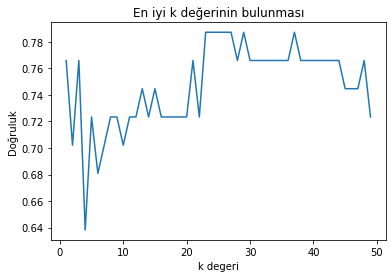

In [ ]:
score_list= []

for each in range(1,50):
  knn2= KNeighborsClassifier(n_neighbors = each)
  knn2.fit(x_train, y_train)
  score_list.append(knn2.score(x_test, y_test))


plt.plot(range(1,50),score_list)
plt.xlabel("k degeri")
plt.ylabel("Doğruluk")
plt.title("En iyi k değerinin bulunması")
plt.show()



# Support Vector Machine Algoritmasının Eğitimi ve Testi 

- Destek vektör makinesi eğitim verilerindeki herhangi bir noktadan en uzak olan ikli sınıf araasında bir karar sınırı bulan vektör uzayı tabanlı makine öğrenme yöntemi olarak tanımlanabilir. 

In [ ]:
# Destek Vektör Makinesini içeri aktar 

from sklearn.svm import SVC

# destek vektör makinesi eğitimi

svm= SVC(random_state=1)
svm.fit(x_train, y_train) 

#testi 

print("Destek Vektör Makinesi Model Test Doğruluk {} ".format(svm.score(x_test,y_test)))


Destek Vektör Makinesi Model Test Doğruluk 0.7872340425531915 


# Decision Tree Algoritmasının Eğitimi ve Testi 

- Karar ağacı, her dalili düğümün bir öznitelik üzerindeki bir testi, her dalın testin sonucunu ve her yaprak düğümünün bir sınıf etiketinin temsil ettiği akış şemasına benzer bir yapıdır.

- Verinin gürültülü olmadığından emin olduğumuzda kullanmak daha uygundur. Açıklanabilirliği yüksektir. Özellikle gürültülü veride doğruluğu düşüktür

In [ ]:
# Karar ağacı içe aktar 

from sklearn.tree import DecisionTreeClassifier 

#Karar Ağacı Eğitimi

dt= DecisionTreeClassifier()

dt.fit(x_train, y_train)

print("Karar Ağacı Modeli Test Doğruluk: {} ".format(dt.score(x_test, y_test)))

Karar Ağacı Modeli Test Doğruluk: 0.7872340425531915 


# Random Forest Algoritmasının Eğitimi ve Testi 
- Sınıflandırma için eğitim aşamasında çok sayıda karar ağacı oluşturarak problemin tipine göre sınıf tahmini yapan bir toplu öğrenme yöndetimidir. 

In [ ]:
# Rastgele orman içeri aktar 
from sklearn.ensemble import RandomForestClassifier

#rastgele Orman eğitimi 

rf= RandomForestClassifier(n_estimators=100, random_state=1) #100 tane karar ağacı oluşturacak
rf.fit(x_train, y_train)

print("Random Forest ALgoritması Modeli Test Doğruluk {}".format(rf.score(x_test, y_test)))

Random Forest ALgoritması Modeli Test Doğruluk 0.8723404255319149


# Sınıflandırma Modellerinin Değerlendirilmesi 
### Doğruluk (Accuracy):
- Doğruluk, bir ölçüm sisteminin doğruluğu, bir niceliğin ölçüm değerine olan yakınlık derecesidir.

### Karışıklık Matrisi (Confusion Matrix) : 
-  Makinene öğrenimi ve özellikle istatiksel sınıflandırma probleminde, hata matrisi olarak da bilinen karışıklık matrisi, bir algoritmanın performansının, tipik olarak denetimli bir öğrenme olanının görselleştirmesine izin veren bir tablo düzenidir. 

In [ ]:
# confusion matrix 
from sklearn.metrics import confusion_matrix

y_pred= rf.predict(x_test) # random forest modelinin confusion matrix'ine bakıyoruz. 
cm= confusion_matrix(y_test,y_pred)
cm

array([[14,  3],
       [ 3, 27]])

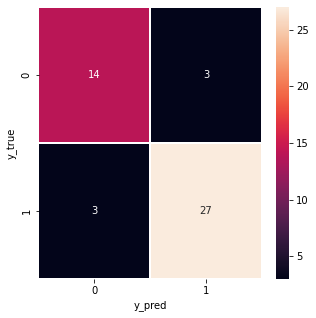

In [ ]:
# sıcaklık haritası 
f, ax = plt.subplots(figsize= (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="white", fmt= ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Kümeleme (Clustering)
- Kümeleme bir veri setinde benzer özellikler gösteren verilerin gruplara ayrılmasına denir. 
- Gözetimsiz öğrenme yöntemidir.

## K- Ortalama Kümeleme  (K-Means)

In [4]:
 # kütüphanaleri ekleyelim
 import numpy as np 
 import pandas as pd
 import matplotlib.pyplot as plt 

In [5]:
#veri seti oluşturalım

# küme1 
x1= np.random.normal(25,5,1000)
y1= np.random.normal(25,5,1000)

#küme2 
x2= np.random.normal(55,5,1000)
y2= np.random.normal(60,5,1000)

#küme 3 
x3= np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary= {"x":x,"y":y}
data=pd.DataFrame(dictionary)
data.head()


,x,y
0,10.518653,36.622957
1,22.789628,19.125358
2,30.764633,29.973201
3,31.140059,26.941510
4,30.842756,30.575937


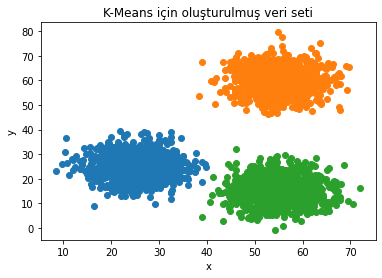

In [6]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Means için oluşturulmuş veri seti")
plt.show()

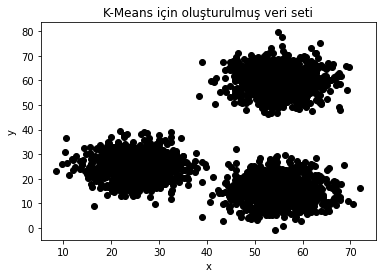

In [8]:
# K-means algoritması  veriyi böyle görecek
plt.figure()
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-Means için oluşturulmuş veri seti")
plt.show()

## K değerinin seçimi
- K değerini seçmek için dirsek yöntemini kullancağız. 

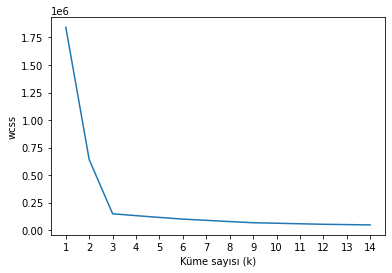

In [12]:
# k-means  içeri aktar 
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Küme sayısı (k)")
plt.ylabel("wcss")
plt.show()

K=3 değeri için, 3-ortalama kümeleme yyöntemini eğitip, testini yapıp sonrasında görselleştireceğiz. 

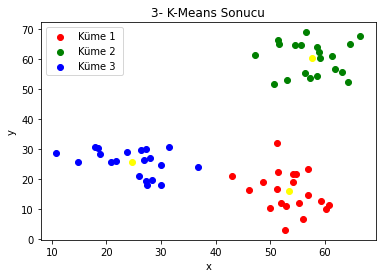

In [43]:
k_ortalama=KMeans(n_clusters=3)
kumeler= k_ortalama.fit_predict(data)

data["label"]= kumeler

plt.figure()
plt.scatter(data.x[data.label== 0],data.y[data.label==0],color="red",label="Küme 1")
plt.scatter(data.x[data.label== 1],data.y[data.label==1],color="green",label ="Küme 2 ")
plt.scatter(data.x[data.label== 2],data.y[data.label==2],color="blue",label="Küme 3")
plt.scatter(k_ortalama.cluster_centers_[:,0],k_ortalama.cluster_centers_[:,1],color="yellow")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3- K-Means Sonucu")
plt.show()


## Hiyerarşik Kümeleme 
- Hiyerarşik kümeleme, bir hiyerarşi oluşturmaya çalışan bir küme analizidir.
- Hiyerarşik kümeleme stratejileri genellikle iki türe ayrılır: 
  1. Aglomeratif: Bu "aşağıdan yukarıya" bir yaklaşımdır. Her gözlem kendi kümesinde başlar ve hiyerarşide yukarı çıktıkça küme çiftleri birleştirilir.
  2. Bölücü: bu "yukarıdan aşağıya" bir yaklaşımdır. tüm gözlemler tek bir kümede başlar ve bölmeler, hiyerarşide aşağı doğru ilerlerken yinelemeli olarak gerçekleştirilir. 
  




### Veri seti oluşturma: 
- bu bölümde hiyerarşik kümeleme algoritmasını eğitebilmek için gerekli olan veriyi oluşturacağız.
- veri içerisinde 3 ayrı küme bulunacak.

In [33]:
# kütüphanaleri içeriye aktar 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [36]:
#veri seti oluşturalım

# küme1 
x1= np.random.normal(25,5,20)
y1= np.random.normal(25,5,20)

#küme2 
x2= np.random.normal(55,5,20)
y2= np.random.normal(60,5,20)

#küme 3 
x3= np.random.normal(55,5,20)
y3=np.random.normal(15,5,20)

x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

dictionary= {"x":x,"y":y}
data=pd.DataFrame(dictionary)
data.head()


,x,y
0,29.954693,17.921623
1,36.746617,24.037228
2,31.415818,30.514725
3,26.331667,29.511669
4,17.909585,30.484357


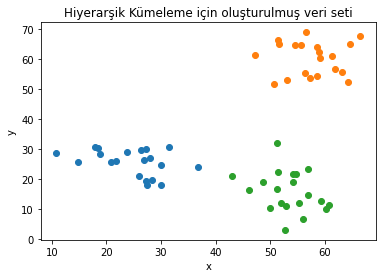

In [37]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme için oluşturulmuş veri seti")
plt.show()

### Dendogram Gösterimi 



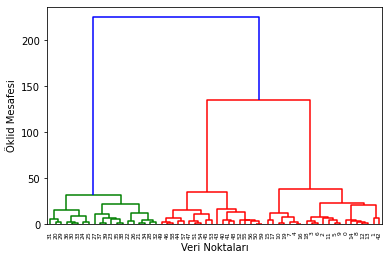

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

### Hiyerarşik kümeleme Algoritması Eğitimi ve Testi 
- hiyerarşik kümeleme yöntemini 3 adet küme oluşturması için eğitip, testini yapacağız. 

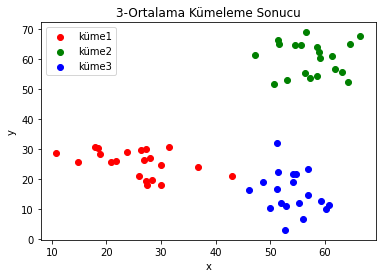

In [47]:
from sklearn.cluster import AgglomerativeClustering

hiyerarsi_kume= AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="ward")
kume=hiyerarsi_kume.fit_predict(data)

data["label"]=kume


plt.figure()
plt.scatter(data.x[data.label== 0],data.y[data.label==0],color="red",label="küme1")
plt.scatter(data.x[data.label== 1],data.y[data.label==1],color="green",label="küme2")
plt.scatter(data.x[data.label== 2],data.y[data.label==2],color="blue",label="küme3")
plt.xlabel("x")
plt.ylabel("y")
plt.title("3-Ortalama Kümeleme Sonucu")
plt.legend()
plt.show()


